# Shritesh_Jagtap_mini_project

## Omicron Sentiment Analysis using Python
The dataset that I am using for the task of Omicron sentiment analysis is downloaded from Kaggle, which was initially collected from Twitter when people were sharing their opinions about the Omicron variant. So let’s start the task of Omicron sentiment analysis by importing the necessary Python libraries and the dataset

In [1]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error           

In [2]:
omi=pd.read_csv("D:/NIIT/ADDp/omicron.csv/omicron.csv")
omi

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,1499644571827019777,Self Clean Solutions,"Scotland, United Kingdom","PureZone are making clean, visible. We special...",2019-03-27 15:05:56,29,73,134,False,2022-03-04 07:15:02,As more of us head back into office environmen...,NaN,Woofy Social Media Scheduler,0,0,False
17042,1499644487705849856,Kuldip Patel,"Auckland Region, New Zealand","Love Sports, Live Sports",2011-02-07 10:32:23,47,155,4278,False,2022-03-04 07:14:42,After long time it’s such a great feeling to w...,NaN,Twitter for iPhone,0,0,False
17043,1499643983877873666,Dr Asad Khan FRCP FRACP 🇵🇸🇳🇿🇮🇳🇬🇧#FBLC,Plague Island,Lung doctor. Life on pause since Nov 20 #LongC...,2014-07-30 10:38:00,12288,1400,7564,False,2022-03-04 07:12:42,#NewZealand #LongCovidKids #Masks #ventilation...,"['NewZealand', 'LongCovidKids', 'Masks', 'vent...",Twitter for iPhone,9,54,False
17044,1499643896174989316,Dr. Melvin Sanicas | #GetVaccinated,Switzerland & Singapore,Physician 🩺 Scientist 🔬\n⚕ #TeamHalo 😷 #COVID1...,2017-07-19 15:21:32,40060,2180,22929,False,2022-03-04 07:12:21,Can a patient be co-infected with different #v...,['variants'],Twitter Web App,5,13,False


In [3]:
omi.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [4]:
omi.isnull().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
omi.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
data=omi[['id', 'user_name','user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text']]

In [7]:
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

In [8]:
data["text"] = data["text"].apply(cleaning)

In [9]:
data.head()

,id,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text
0,1491840066506743820,Nathan Joyner,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,daily us confirmed covid cases by county for m...
1,1491839660674490371,Gatherer Thompson,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,yascha mounk cdc says number of fully vaccinat...
2,1491839607368867842,Nathan Joyner,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,daily us confirmed covid cases by county for l...
3,1491839207169351689,Nathan Joyner,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,daily us confirmed covid cases by county for l...
4,1491839165608177667,Brownyard Group,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,with the beijing2022 winterolympics already un...


## VADER SENTIMENT ANALYSIS

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
res2 = {}
t = 0
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['text']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/17046 [00:00<?, ?it/s]

In [13]:
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.929,0.071,0.0772
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.876,0.124,0.3400
...,...,...,...,...
17041,0.000,0.798,0.202,0.6486
17042,0.000,0.772,0.228,0.6808
17043,0.115,0.885,0.000,-0.2960
17044,0.000,0.907,0.093,0.2144


In [14]:
Main_data = pd.concat([data, j], axis = 1)

In [15]:
Main_data.insert(2, 'Sentiments', np.nan)
Main_data.loc[Main_data['compound']>=0.05, 'Sentiments'] = 'pos'
Main_data.loc[Main_data['compound']<=-0.05, 'Sentiments'] = 'neg'
Main_data.loc[((Main_data['compound'] > -0.05) & (Main_data['compound'] < 0.05)), 'Sentiments'] = 'neutral'

In [16]:
Main_data.head()

,id,user_name,Sentiments,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,neg,neu,pos,compound
0,1491840066506743820,Nathan Joyner,neutral,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,daily us confirmed covid cases by county for m...,0.0,1.000,0.000,0.0000
1,1491839660674490371,Gatherer Thompson,pos,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,yascha mounk cdc says number of fully vaccinat...,0.0,0.929,0.071,0.0772
2,1491839607368867842,Nathan Joyner,neutral,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,daily us confirmed covid cases by county for l...,0.0,1.000,0.000,0.0000
3,1491839207169351689,Nathan Joyner,neutral,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,daily us confirmed covid cases by county for l...,0.0,1.000,0.000,0.0000
4,1491839165608177667,Brownyard Group,pos,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,with the beijing2022 winterolympics already un...,0.0,0.876,0.124,0.3400


In [17]:
Main_data['Sentiments'].value_counts()

neutral    7441
pos        5490
neg        4115
Name: Sentiments, dtype: int64

## Word Cloud

In [18]:
from wordcloud import WordCloud, STOPWORDS                          

In [19]:
# Getting stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# applying stopword function on review
Main_data['text'] = Main_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [21]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 50,
    stopwords = stopwords,
    scale = 3).generate(str(Main_data["text"]))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [22]:
neg=Main_data[Main_data["Sentiments"] == "neg"]["text"]
pos=Main_data[Main_data["Sentiments"] == "pos"]["text"]
neu=Main_data[Main_data["Sentiments"] == "neutral"]["text"]

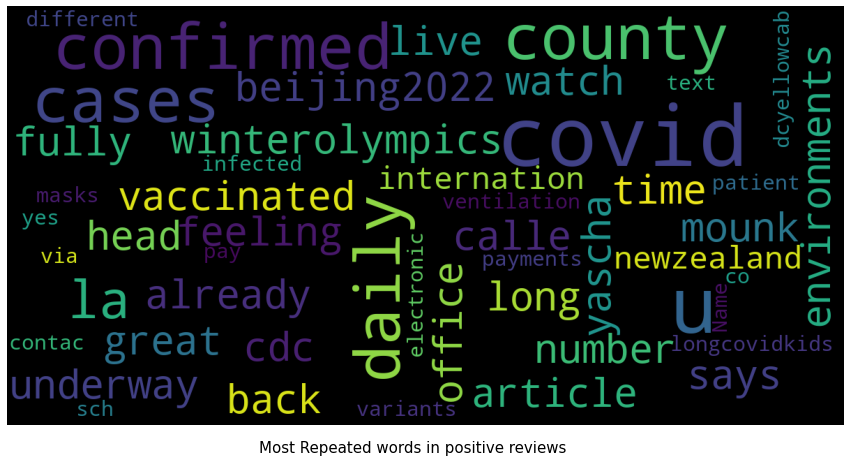

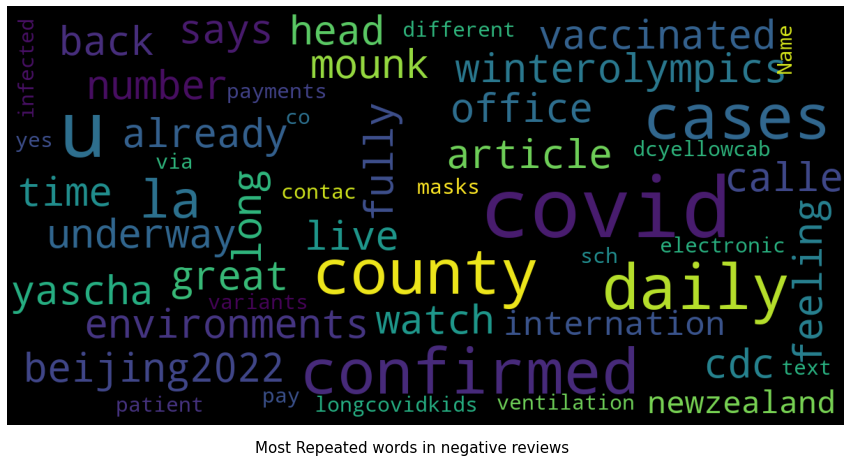

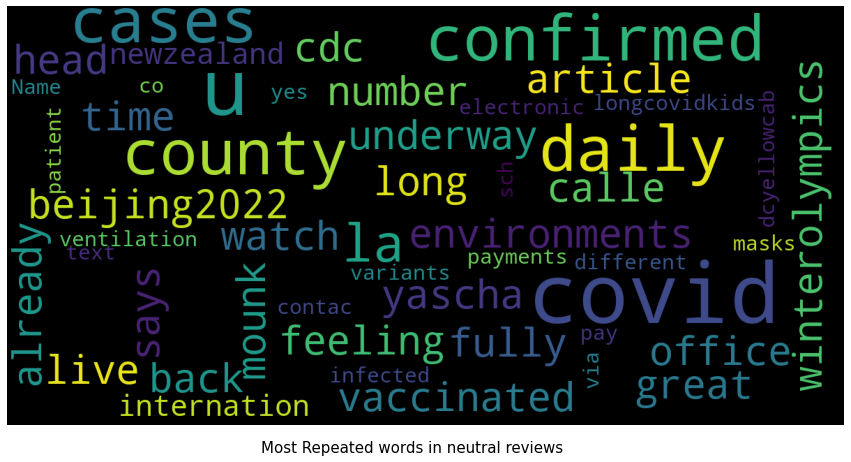

In [23]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

In [30]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)   # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)                                         # Transforming the corpus into numbers
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]     # it provides a dictionary with the mapping of the word item index 
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

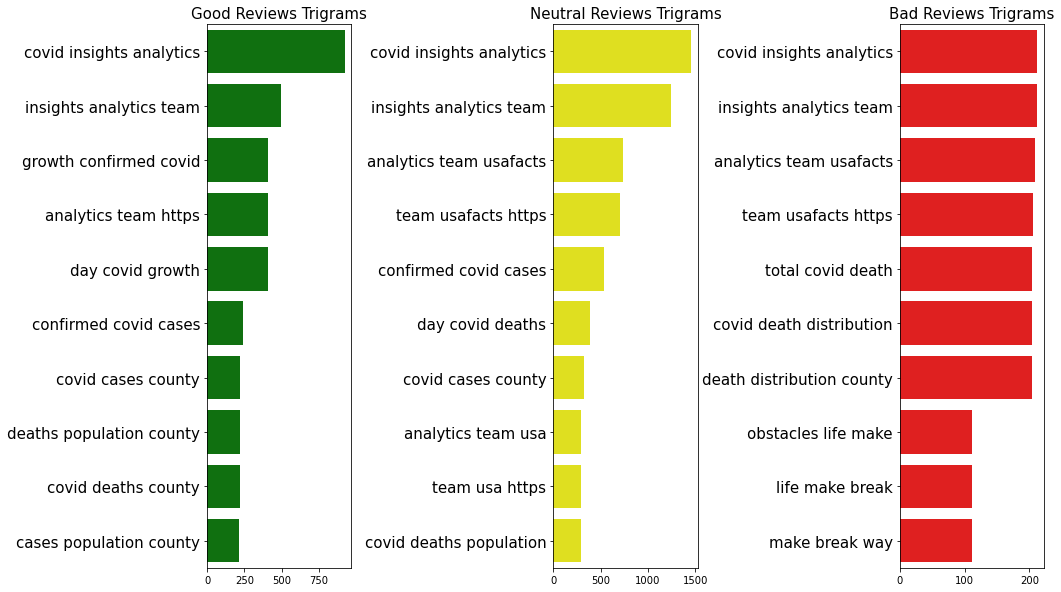

In [31]:
def n_gram_plot(Main_data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in Main_data]
    y=[x[1] for x in Main_data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Trigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()

## CONCLUSIONS:
1. In Omicron Sentiment Analysis, There are high number of Neutral Sentiments. 
2. The word "Covid Insights analytics" is most repeated word among all sentiments